# Classification - Boosting

https://www.kaggle.com/uciml/breast-cancer-wisconsin-data
<b> Goal:</b> Predict Breast Cancer ('diagnosis')

    id: ID number
    diagnosis: The diagnosis of breast tissues (M = malignant, B = benign)
    radius_mean: mean of distances from center to points on the perimeter
    texture_mean: standard deviation of gray-scale values
    perimeter_mean: mean size of the core tumor
    area_mean: no information
    smoothness_mean: mean of local variation in radius lengths
    compactness_mean: mean of perimeter^2 / area - 1.0
    concavity_mean: mean of severity of concave portions of the contour
    concave points_mean: mean for number of concave portions of the contour
    symmetry_mean: no information
    fractal_dimension_mean: mean for "coastline approximation" - 1
    radius_se: standard error for the mean of distances from center to points on the perimeter
    texture_se: standard error for standard deviation of gray-scale values
    perimeter_se: no information
    area_se: no information
    smoothness_se: standard error for local variation in radius lengths
    compactness_se: standard error for perimeter^2 / area - 1.0
    concavity_se: standard error for severity of concave portions of the contour
    concave points_se: standard error for number of concave portions of the contour
    symmetry_se: no information
    fractal_dimension_se: standard error for "coastline approximation" - 1
    radius_worst: "worst" or largest mean value for mean of distances from center to points on the perimeter
    texture_worst: "worst" or largest mean value for standard deviation of gray-scale values
    perimeter_worst: no information
    area_worst: no information
    smoothness_worst: "worst" or largest mean value for local variation in radius lengths
    compactness_worst: "worst" or largest mean value for perimeter^2 / area - 1.0
    concavity_worst: "worst" or largest mean value for severity of concave portions of the contour
    concave points_worst: "worst" or largest mean value for number of concave portions of the contour
    symmetry_worst: no information
    fractal_dimension_worst: "worst" or largest mean value for "coastline approximation" - 1

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import cm as cm
import random
import sys
import time
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import AdaBoostClassifier
import scikitplot as skplt

from xgboost import XGBClassifier
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

plt.rcParams["figure.figsize"] = (8, 8) #Change matplotlib Box Size
plt.rcParams["font.size"] = 14 #Change matplotlib Font Size

## Part 1 - Running Models

In [2]:
data = pd.read_csv('data-breast-cancer.csv', delimiter=',')

In [3]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


    1) ID cannot be used for classification - Drop
    2) Diagnosis is our y label
    3) Unnamed: 32 is NaN - Drop

In [4]:
#Drop unused columns and move y to separate variable
y = data['diagnosis'] # move y
X = data.drop(['id', 'diagnosis','Unnamed: 32'],1)# drop id and diagnosis
data = data.drop(['id','Unnamed: 32'],1)# drop id and diagnosis
X.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


Training set has 398 samples.
Testing set has 171 samples.
              precision    recall  f1-score   support

           B       0.96      0.98      0.97       108
           M       0.97      0.94      0.95        63

   micro avg       0.96      0.96      0.96       171
   macro avg       0.97      0.96      0.96       171
weighted avg       0.96      0.96      0.96       171

[[106   2]
 [  4  59]]
Accuracy: 96.49%


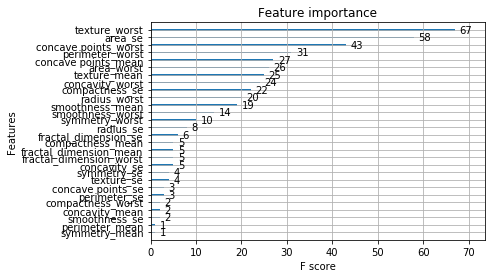

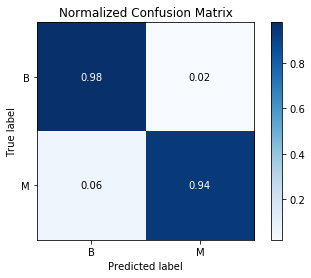

In [5]:
#Intial Test with XGBoost and Feature Importance

from xgboost import plot_importance

#Splitting into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3 , random_state=0)

# Show the results of the split
print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))

xgb = XGBClassifier()
xgb.fit(X_train, y_train)

predictions = xgb.predict(X_test)

plot_importance(xgb)

print(classification_report(y_test,predictions))
print(confusion_matrix(y_test,predictions))
skplt.metrics.plot_confusion_matrix(y_test, predictions, normalize=True)

accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))


Training set has 398 samples.
Testing set has 171 samples.
              precision    recall  f1-score   support

           B       0.98      0.96      0.97       108
           M       0.94      0.97      0.95        63

   micro avg       0.96      0.96      0.96       171
   macro avg       0.96      0.97      0.96       171
weighted avg       0.97      0.96      0.97       171

[[104   4]
 [  2  61]]
Accuracy: 96.49%


,importance
feature,
area_se,0.10
compactness_se,0.08
texture_worst,0.08
concave points_mean,0.08
fractal_dimension_se,0.08
concavity_worst,0.06
area_worst,0.06
perimeter_worst,0.06
texture_mean,0.06


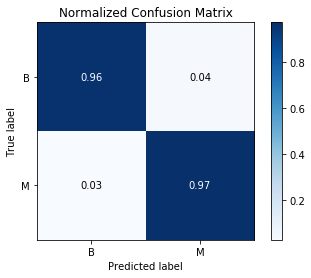

In [6]:
#Intial Test with Adaboost and Feature Importance

#Splitting into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3 , random_state=0)

# Show the results of the split
print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))

abc = AdaBoostClassifier()

abc.fit(X_train, y_train)

predictions = abc.predict(X_test)

#plot_importance(clf)

print(classification_report(y_test,predictions))
print(confusion_matrix(y_test,predictions))
skplt.metrics.plot_confusion_matrix(y_test, predictions, normalize=True)
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

importances = pd.DataFrame({'feature':X_train.columns,'importance':np.round(abc.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
importances

## Part 2 - Feature Selection

Number of Benign:  357
Number of Malignant :  212


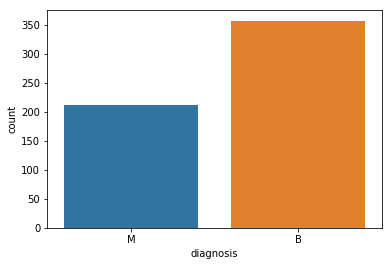

In [7]:
# Frequency of cancer stages
sns.countplot(data['diagnosis'],label="Count")
B, M = y.value_counts()
print('Number of Benign: ',B)
print('Number of Malignant : ',M)
None

In [8]:
X.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [9]:
data_n_2 = (X - X.mean()) / (X.std())   

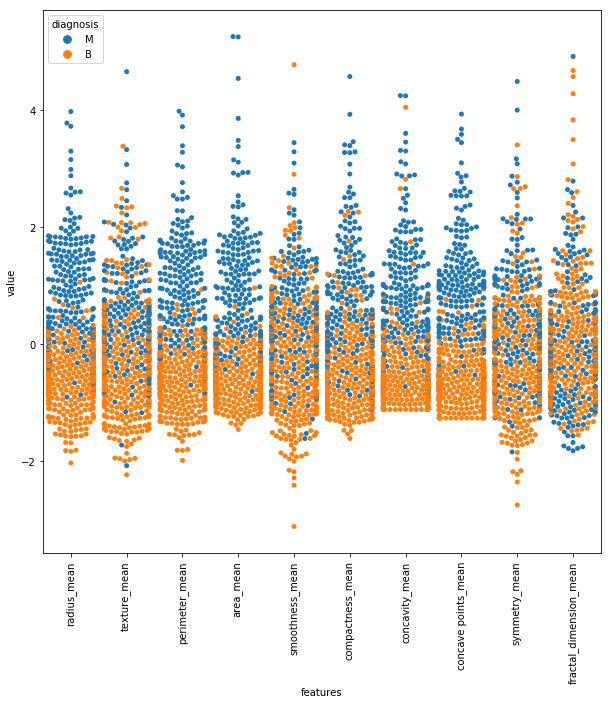

In [10]:
data = pd.concat([y,data_n_2.iloc[:,0:10]],axis=1)
data = pd.melt(data,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(10,10))
tic = time.time()
sns.swarmplot(x="features", y="value", hue="diagnosis", data=data)

plt.xticks(rotation=90)
None

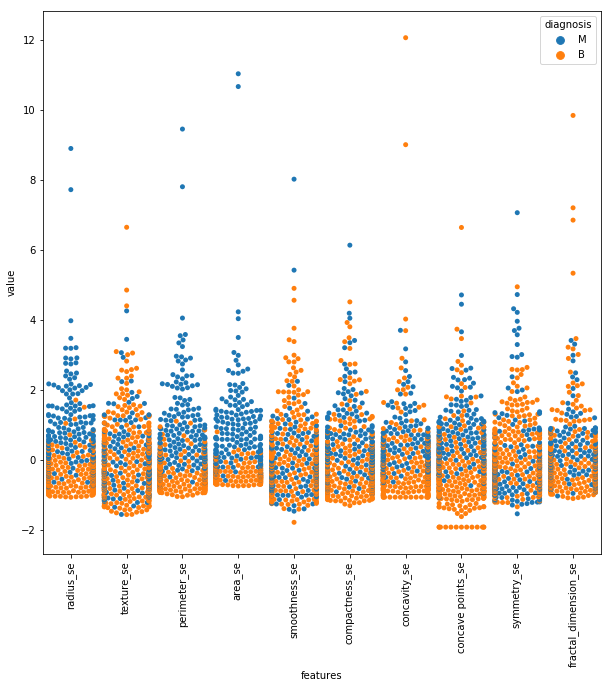

In [11]:
data = pd.concat([y,data_n_2.iloc[:,10:20]],axis=1)
data = pd.melt(data,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(10,10))
sns.swarmplot(x="features", y="value", hue="diagnosis", data=data)
plt.xticks(rotation=90)
None

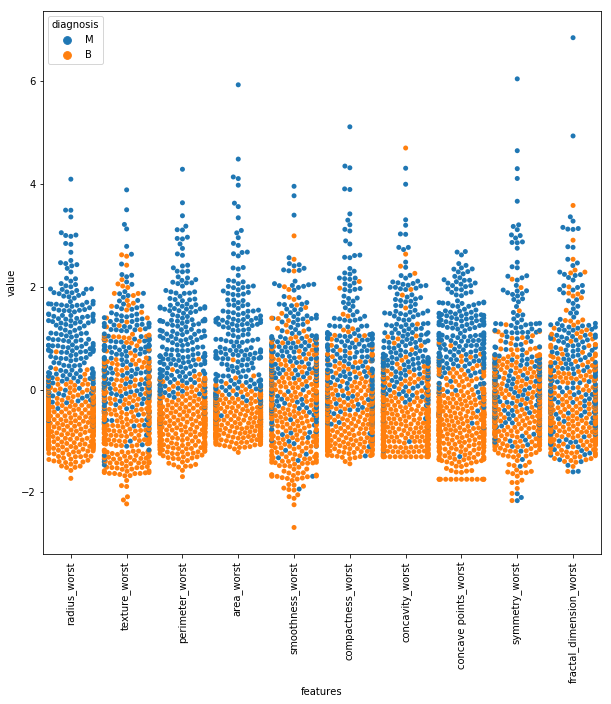

In [12]:
data = pd.concat([y,data_n_2.iloc[:,20:30]],axis=1)
data = pd.melt(data,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(10,10))
sns.swarmplot(x="features", y="value", hue="diagnosis", data=data)
plt.xticks(rotation=90)
None

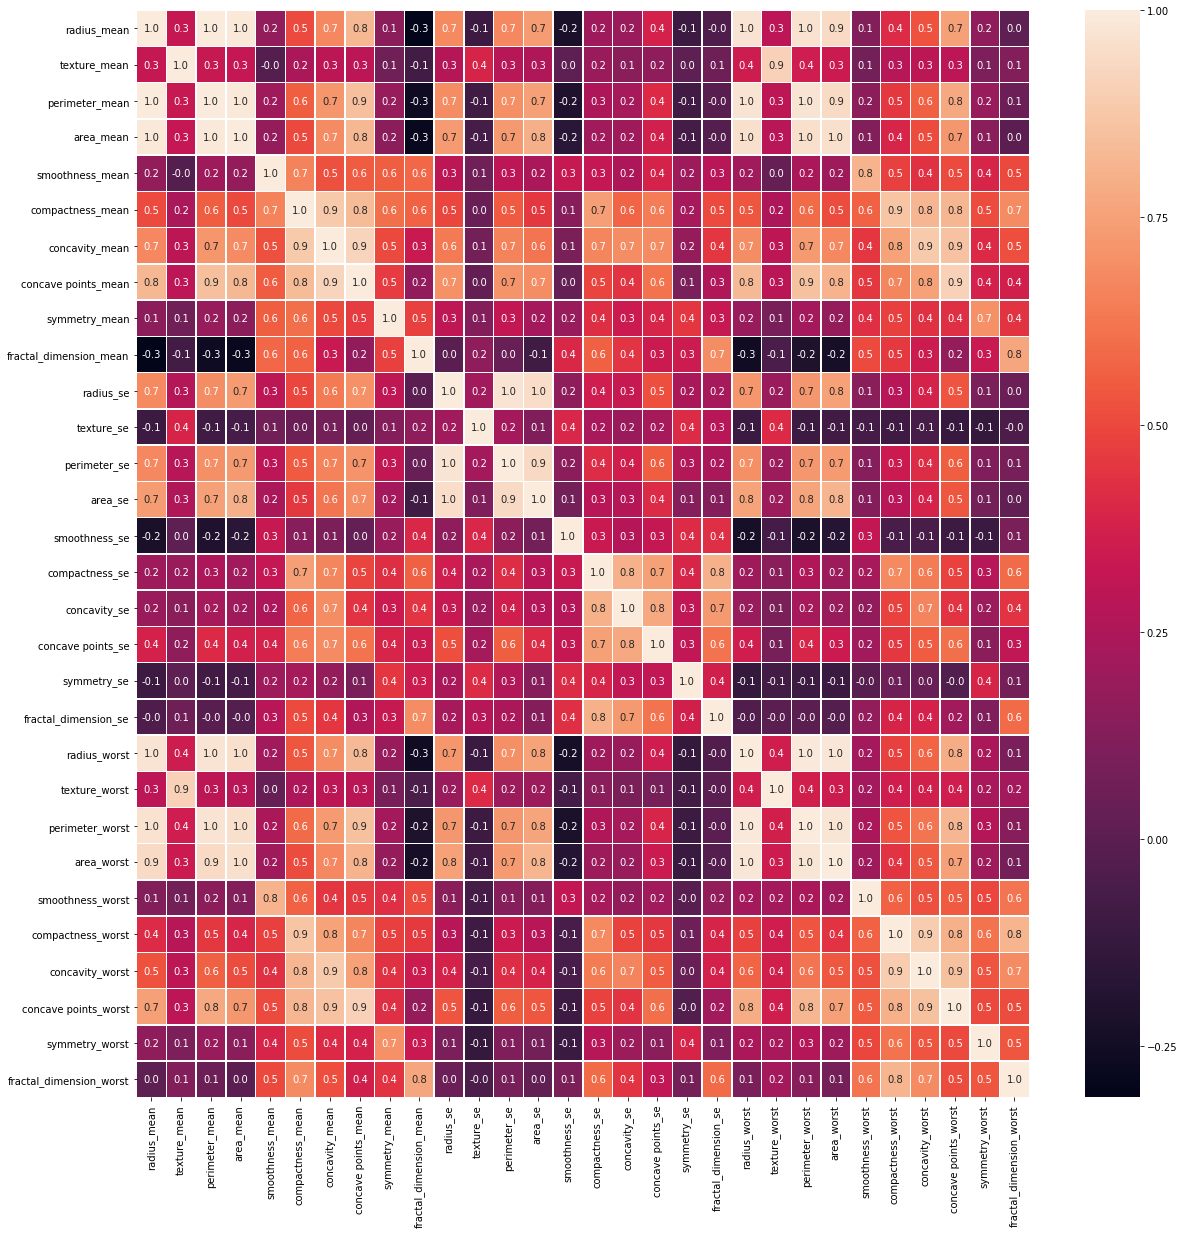

In [13]:
#correlation map
f,ax = plt.subplots(figsize=(20, 20))
sns.heatmap(X.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)
None

Feature Selection (based on correlation and swarm plots):

    radius_mean, perimeter_mean and area_mean are correlated: 
    Keep - area_mean 
    Drop - radius_mean, perimeter_mean

    Compactness_mean, concavity_mean and concave points_mean are correlated: 
    Keep - concavity_mean 
    Drop - Compactness_mean, concave points_mean

    radius_se, perimeter_se and area_se are correlated: 
    Keep - area_se 
    Drop - radius_se, perimeter_se
    
    radius_worst, perimeter_worst and area_worst are correlated:
    Keep - area_worst 
    Drop - radius_worst, perimeter_worst
    
    Compactness_worst, concavity_worst and concave points_worst are correlated:
    Keep - concavity_worst
    Drop - Compactness_worst, concave points_worst
    
    Compactness_se, concavity_se and concave points_se are correlated:
    Keep - concavity_se 
    Drop - Compactness_se, concave points_se
    
    texture_mean and texture_worst v:
    Keep - texture_mean
    
    area_worst and area_mean are correlated:
    Keep - area_mean
    




In [14]:
drop_list1 = ['perimeter_mean','radius_mean','compactness_mean','concave points_mean','radius_se','perimeter_se','radius_worst','perimeter_worst','compactness_worst','concave points_worst','compactness_se','concave points_se','texture_mean','area_worst']
X_1 = X.drop(drop_list1,axis = 1 )
X_1.head()

,area_mean,smoothness_mean,concavity_mean,symmetry_mean,fractal_dimension_mean,texture_se,area_se,smoothness_se,concavity_se,symmetry_se,fractal_dimension_se,texture_worst,smoothness_worst,concavity_worst,symmetry_worst,fractal_dimension_worst
0,1001.0,0.11840,0.3001,0.2419,0.07871,0.9053,153.40,0.006399,0.05373,0.03003,0.006193,17.33,0.1622,0.7119,0.4601,0.11890
1,1326.0,0.08474,0.0869,0.1812,0.05667,0.7339,74.08,0.005225,0.01860,0.01389,0.003532,23.41,0.1238,0.2416,0.2750,0.08902
2,1203.0,0.10960,0.1974,0.2069,0.05999,0.7869,94.03,0.006150,0.03832,0.02250,0.004571,25.53,0.1444,0.4504,0.3613,0.08758
3,386.1,0.14250,0.2414,0.2597,0.09744,1.1560,27.23,0.009110,0.05661,0.05963,0.009208,26.50,0.2098,0.6869,0.6638,0.17300
4,1297.0,0.10030,0.1980,0.1809,0.05883,0.7813,94.44,0.011490,0.05688,0.01756,0.005115,16.67,0.1374,0.4000,0.2364,0.07678


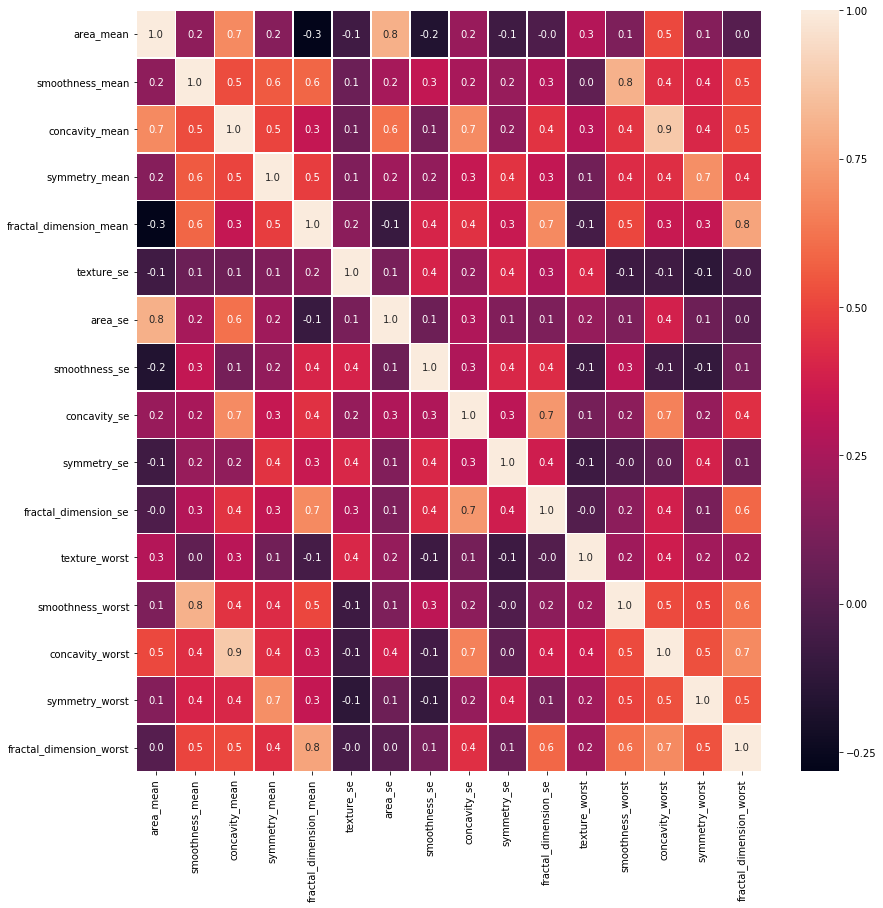

In [15]:
#Correlation map after selection
f,ax = plt.subplots(figsize=(14, 14))
sns.heatmap(X_1.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

In [16]:
#Splitting into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_1, y, test_size=0.3 , random_state=0)

# Show the results of the split
print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))

Training set has 398 samples.
Testing set has 171 samples.


Training set has 398 samples.
Testing set has 171 samples.
              precision    recall  f1-score   support

           B       0.99      0.98      0.99       108
           M       0.97      0.98      0.98        63

   micro avg       0.98      0.98      0.98       171
   macro avg       0.98      0.98      0.98       171
weighted avg       0.98      0.98      0.98       171

[[106   2]
 [  1  62]]
Accuracy: 98.25%


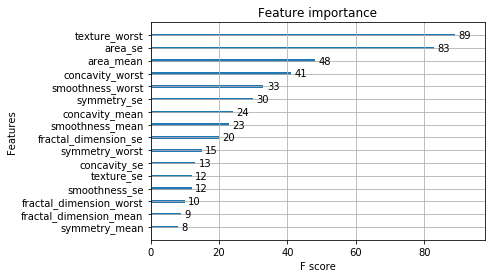

In [17]:
#XG Boost after feature selection

X_train, X_test, y_train, y_test = train_test_split(X_1, y, test_size=0.3 , random_state=0)

# Show the results of the split
print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))

xgb = XGBClassifier()
xgb.fit(X_train, y_train)

predictions = xgb.predict(X_test)

plot_importance(xgb)

print(classification_report(y_test,predictions))
print(confusion_matrix(y_test,predictions))
cm = confusion_matrix(y_test,predictions)
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

In [18]:
abc = AdaBoostClassifier()

X_train, X_test, y_train, y_test = train_test_split(X_1, y, test_size=0.3 , random_state=0)

# Show the results of the split
print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))

abc.fit(X_train, y_train)

predictions = abc.predict(X_test)

print(classification_report(y_test,predictions))
print(confusion_matrix(y_test,predictions))
cm = confusion_matrix(y_test,predictions)
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

importances = pd.DataFrame({'feature':X_train.columns,'importance':np.round(abc.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
importances

Training set has 398 samples.
Testing set has 171 samples.
              precision    recall  f1-score   support

           B       0.99      0.96      0.98       108
           M       0.94      0.98      0.96        63

   micro avg       0.97      0.97      0.97       171
   macro avg       0.96      0.97      0.97       171
weighted avg       0.97      0.97      0.97       171

[[104   4]
 [  1  62]]
Accuracy: 97.08%


,importance
feature,
area_se,0.14
texture_worst,0.14
area_mean,0.10
concavity_mean,0.10
symmetry_mean,0.08
fractal_dimension_se,0.08
concavity_worst,0.08
smoothness_mean,0.06
smoothness_worst,0.06


# Part 3 -  Hyperparameter Tuning

## 1. Random Search

### XG Boost

In [19]:
pipeline = Pipeline([('scl', StandardScaler()),('classifier', XGBClassifier())])

X_train, X_test, y_train, y_test = train_test_split(X_1, y, test_size=0.3 , random_state=0)

# Show the results of the split
print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))

parameters = {'classifier__learning_rate': [0.01, 0.03, 0.05], 
              'classifier__n_estimators': [50, 200, 1000, 1200], 
              'classifier__max_depth': [3, 4, 5,6,7,8,9,10],
              'classifier__min_child_weight': [0,1]}

#Set cross validation
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=123)

xgb_gs = RandomizedSearchCV(pipeline, parameters,cv=cv)
xgb_gs.fit(X_train, y_train)

#print(xgb_gs.cv_results_)

print("Best score: %s" % (xgb_gs.best_score_))
print("Best parameter set: %s" % (xgb_gs.best_params_))
predictions = xgb_gs.predict(X_test)

Training set has 398 samples.
Testing set has 171 samples.


/Users/mousadak/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Best score: 0.9698492462311558
Best parameter set: {'classifier__n_estimators': 1000, 'classifier__min_child_weight': 0, 'classifier__max_depth': 4, 'classifier__learning_rate': 0.03}


Accuracy: 98.25%
              precision    recall  f1-score   support

           B       0.99      0.98      0.99       108
           M       0.97      0.98      0.98        63

   micro avg       0.98      0.98      0.98       171
   macro avg       0.98      0.98      0.98       171
weighted avg       0.98      0.98      0.98       171

[[106   2]
 [  1  62]]


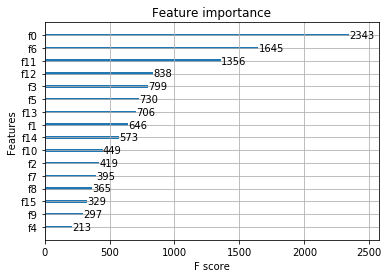

In [20]:
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
print(classification_report(y_test,predictions))
print(confusion_matrix(y_test,predictions))

plot_importance(xgb_gs.best_estimator_.named_steps["classifier"])
None

### Adaboost

In [21]:
pipeline = Pipeline([('scl', StandardScaler()),('adaboost', AdaBoostClassifier())])

X_train, X_test, y_train, y_test = train_test_split(X_1, y, test_size=0.3 , random_state=0)

# Show the results of the split
print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))


parameters = {'adaboost__n_estimators': [25, 50, 100, 200,300, 400],
              'adaboost__learning_rate': [1, 0.5, 0.3, 0.2, 0.1,0.01]}

#set cross validation
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=123)

clf_gs = RandomizedSearchCV(pipeline, parameters,cv=cv)
clf_gs.fit(X_train, y_train)

#print(clf_gs.cv_results_)

print("Best score: %s" % (clf_gs.best_score_))
print("Best parameter set: %s" % (clf_gs.best_params_))
predictions = clf_gs.predict(X_test)

Training set has 398 samples.
Testing set has 171 samples.


/Users/mousadak/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Best score: 0.9773869346733668
Best parameter set: {'adaboost__n_estimators': 400, 'adaboost__learning_rate': 0.5}


In [22]:
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
print(classification_report(y_test,predictions))
print(confusion_matrix(y_test,predictions))

importances = pd.DataFrame({'feature':X_train.columns,'importance':np.round(clf_gs.best_estimator_.named_steps["adaboost"].feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
importances

Accuracy: 97.08%
              precision    recall  f1-score   support

           B       0.99      0.96      0.98       108
           M       0.94      0.98      0.96        63

   micro avg       0.97      0.97      0.97       171
   macro avg       0.96      0.97      0.97       171
weighted avg       0.97      0.97      0.97       171

[[104   4]
 [  1  62]]


,importance
feature,
area_se,0.130
texture_worst,0.122
symmetry_mean,0.088
area_mean,0.085
fractal_dimension_se,0.085
concavity_worst,0.078
concavity_mean,0.070
smoothness_worst,0.070
concavity_se,0.058


## 2. Grid Search

### XG Boost

In [23]:
pipeline = Pipeline([('scl', StandardScaler()),('classifier', XGBClassifier())])

X_train, X_test, y_train, y_test = train_test_split(X_1, y, test_size=0.3 , random_state=0)

# Show the results of the split
print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))

parameters = {'classifier__learning_rate': [0.01, 0.03, 0.05], 
              'classifier__n_estimators': [50, 200, 1000, 1200], 
              'classifier__max_depth': [3, 4, 5,6,7,8,9,10],
              'classifier__min_child_weight': [0,1]}

#Set cross validation
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=123)

xgb_gs = GridSearchCV(pipeline, parameters,cv=cv)
xgb_gs.fit(X_train, y_train)

#print(xgb_gs.cv_results_)

print("Best score: %s" % (xgb_gs.best_score_))
print("Best parameter set: %s" % (xgb_gs.best_params_))
predictions = xgb_gs.predict(X_test)

Training set has 398 samples.
Testing set has 171 samples.


/Users/mousadak/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Best score: 0.9723618090452262
Best parameter set: {'classifier__learning_rate': 0.05, 'classifier__max_depth': 3, 'classifier__min_child_weight': 0, 'classifier__n_estimators': 1000}


Accuracy: 98.25%
              precision    recall  f1-score   support

           B       0.99      0.98      0.99       108
           M       0.97      0.98      0.98        63

   micro avg       0.98      0.98      0.98       171
   macro avg       0.98      0.98      0.98       171
weighted avg       0.98      0.98      0.98       171

[[106   2]
 [  1  62]]


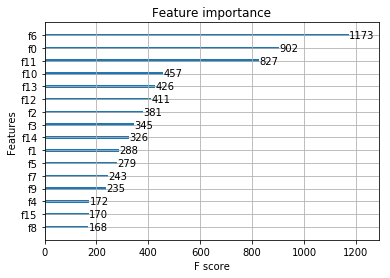

In [24]:
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
print(classification_report(y_test,predictions))
print(confusion_matrix(y_test,predictions))

plot_importance(xgb_gs.best_estimator_.named_steps["classifier"])
None

### Adaboost

In [25]:
pipeline = Pipeline([('scl', StandardScaler()),('adaboost', AdaBoostClassifier())])

X_train, X_test, y_train, y_test = train_test_split(X_1, y, test_size=0.3 , random_state=0)

# Show the results of the split
print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))


parameters = {'adaboost__n_estimators': [25, 50, 100, 200,300, 400],
              'adaboost__learning_rate': [1, 0.5, 0.3, 0.2, 0.1,0.01]}

#set cross validation
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=123)

clf_gs = GridSearchCV(pipeline, parameters,cv=cv)
clf_gs.fit(X_train, y_train)

#print(clf_gs.cv_results_)

print("Best score: %s" % (clf_gs.best_score_))
print("Best parameter set: %s" % (clf_gs.best_params_))
predictions = clf_gs.predict(X_test)

Training set has 398 samples.
Testing set has 171 samples.


/Users/mousadak/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Best score: 0.9798994974874372
Best parameter set: {'adaboost__learning_rate': 1, 'adaboost__n_estimators': 200}


In [26]:
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
print(classification_report(y_test,predictions))
print(confusion_matrix(y_test,predictions))

importances = pd.DataFrame({'feature':X_train.columns,'importance':np.round(clf_gs.best_estimator_.named_steps["adaboost"].feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
importances

Accuracy: 97.66%
              precision    recall  f1-score   support

           B       1.00      0.96      0.98       108
           M       0.94      1.00      0.97        63

   micro avg       0.98      0.98      0.98       171
   macro avg       0.97      0.98      0.98       171
weighted avg       0.98      0.98      0.98       171

[[104   4]
 [  0  63]]


,importance
feature,
area_se,0.145
texture_worst,0.115
fractal_dimension_se,0.095
symmetry_mean,0.085
concavity_mean,0.075
concavity_worst,0.075
area_mean,0.070
concavity_se,0.050
smoothness_worst,0.050
